## Step 0 - Import Libraries and Acquire Data

In [1]:
#Exploratory Data Analysis and Wrangling
import pandas as pd
import numpy as np
import random as rnd

In [2]:
#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import linear_model, datasets

In [5]:
#Read the csv file
df = pd.read_csv("C:/Users/Shreya Sajid/Documents/Git/Alzheimer's Disease Prediction/oasis_longitudinal.csv")

## 1. Data Exploration

In [6]:
#Dimensions of the data
df.shape

(373, 15)

In [7]:
#Obtain Feature Names
print(df.columns.values)

['Subject ID' 'MRI ID' 'Group' 'Visit' 'MR Delay' 'M/F' 'Hand' 'Age'
 'EDUC' 'SES' 'MMSE' 'CDR' 'eTIV' 'nWBV' 'ASF']


In [8]:
#Overview of the data
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [9]:
#Description of the data
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [10]:
#Check for missing values in the data
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

There are 19 missing values in SES and 2 missing values in MMSE.

In [11]:
#To check the datatypes of the features in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [12]:
#Frequency table for Group (Demented or Non-demented)
df['Group'].value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

In [13]:
#Summary of categorical columns
df.describe(include=[np.object])

,Subject ID,MRI ID,Group,M/F,Hand
count,373,373,373,373,373
unique,150,373,3,2,1
top,OAS2_0070,OAS2_0005_MR3,Nondemented,F,R
freq,5,1,190,213,373


#### Inference:

1. Group has 3 categories - Non-demented, Demented and Converted.
2. 'Hand' has only 1 unique value.
3. Subject ID and MRI ID are not of much use.

## 2. Data Visualization

### 2.1 Univariate Analysis

Text(0.5, 1.0, 'Group')

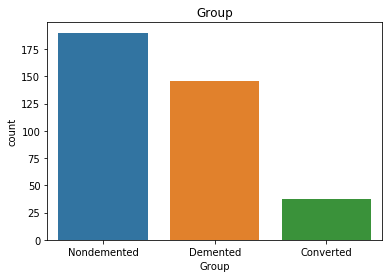

In [14]:
#Frequency plot - Group
sns.countplot(df.Group)
plt.title("Group")

Text(0.5, 1.0, 'Clinical Dementia Rating')

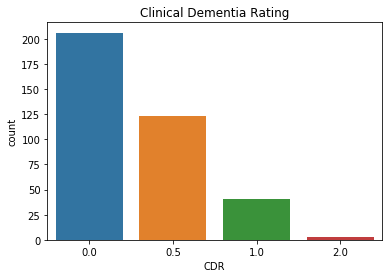

In [15]:
#Frequency plot - CDR
sns.countplot(df.CDR)
plt.title("Clinical Dementia Rating")

Text(0.5, 1.0, 'Visit')

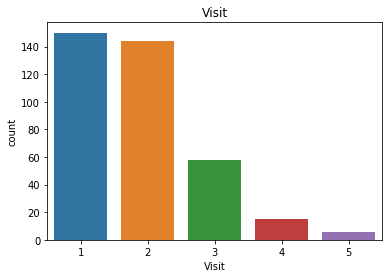

In [16]:
#Frequency plot - Visit
sns.countplot(df.Visit)
plt.title("Visit")

Text(0.5, 1.0, 'Socioeconomic status')

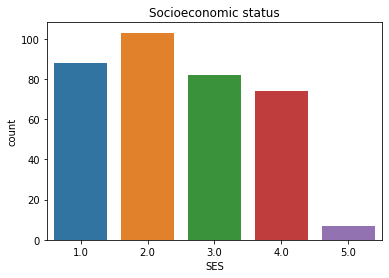

In [17]:
#Frequency plot - SES
sns.countplot(df.SES)
plt.title("Socioeconomic status")

Text(0.5, 1.0, 'estimated Total Intracranial Volume')

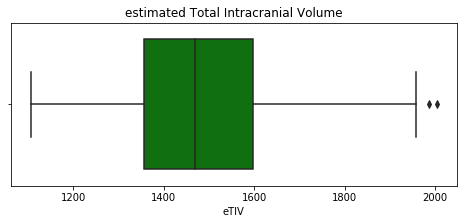

In [18]:
#Boxplot - eTIV
plt.figure(figsize = (8,3))
sns.boxplot(x = 'eTIV',data = df,color = "green")
plt.title("estimated Total Intracranial Volume")

Text(0.5, 1.0, 'MMSE')

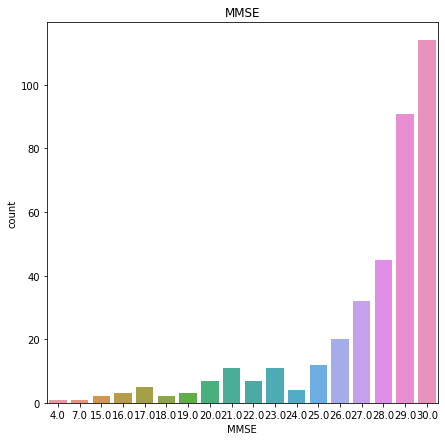

In [19]:
#Frequency plot - MMSE
plt.figure(figsize = (7,7))
sns.countplot(df.MMSE)
plt.title("MMSE")

Text(0.5, 1.0, 'Age')

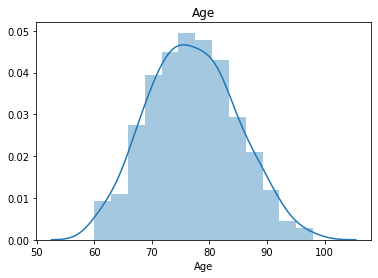

In [20]:
#Histogram - Age
sns.distplot(df.Age)
plt.title("Age")

### 2.2 Bivariate Analysis

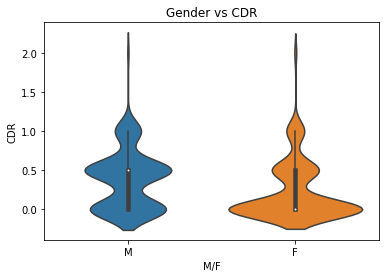

In [21]:
#Violinplot - Gender vs CDR
sns.violinplot(x = 'M/F',y = 'CDR',data = df)
plt.title("Gender vs CDR")
plt.show()

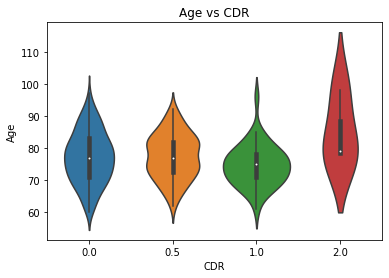

In [22]:
#Violinplot - Age vs CDR
sns.violinplot(x = 'CDR',y = 'Age',data = df)
plt.title("Age vs CDR")
plt.show()

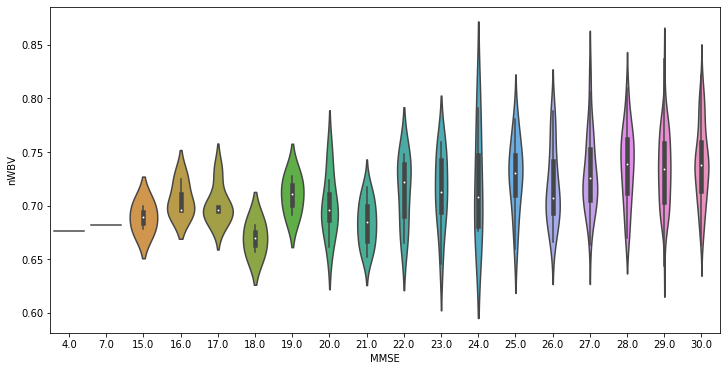

In [23]:
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x="MMSE", y="nWBV",split=True, data=df)
plt.show()

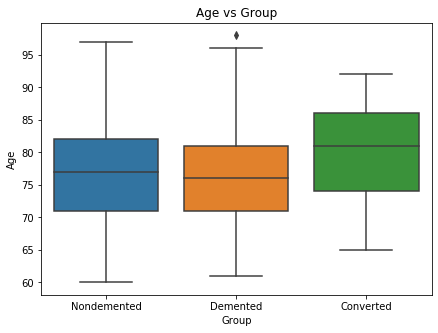

In [24]:
#Boxplot - Age vs Group
plt.figure(figsize = (7,5))
sns.boxplot(x = 'Group',y = 'Age',data = df)
plt.title("Age vs Group")
plt.show()

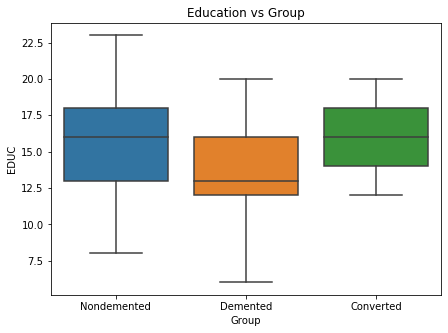

In [25]:
#Boxplot - Education vs Group
plt.figure(figsize = (7,5))
sns.boxplot(x = 'Group',y = 'EDUC',data = df)
plt.title("Education vs Group")
plt.show()